In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

* 数据是LC公司在2007-2018年间的所有贷款数据

In [2]:
data = pd.read_csv("C:/Users/zhang/Desktop/lending-club-loan-data/loan.csv",low_memory = False)
df = data.copy()
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df)

2260668

* 数据一共有2260668条

In [4]:
len(list(df.columns))

145

* 数据中一共有145个特征，但是并不是每个特征都是有作用的，所以需要进行筛选

筛选的前提是要先了解每一个特征的含义，所以下面要针对这145个特征逐一进行了解

下面这些是没有确定含义的特征
* collection_recovery_fee，open_act_il，total_rev_hi_lim，avg_cur_bal，bc_open_to_buy，bc_util，mo_sin_old_il_acct，mo_sin_old_rev_tl_op，mo_sin_rcnt_rev_tl_op，mo_sin_rcnt_tl，mths_since_recent_bc_dlq，mths_since_recent_inq，mths_since_recent_revol_delinq，num_accts_ever_120_pd，num_actv_bc_tl，num_actv_rev_tl，num_bc_sats，num_bc_tl，num_il_tl，num_op_rev_tl，num_rev_accts，num_rev_tl_bal_gt_0，num_tl_120dpd_2m，num_tl_30dpd，num_tl_90g_dpd_24m，num_tl_op_past_12m，pct_tl_nvr_dlq，percent_bc_gt_75，pub_rec_bankruptcies，tot_hi_cred_lim，total_bal_ex_mort，total_bc_limit，total_il_high_credit_limit，revol_bal_joint，sec_app_earliest_cr_line，sec_app_inq_last_6mths，sec_app_mort_acc，sec_app_open_acc，sec_app_revol_util，sec_app_open_act_il，sec_app_num_rev_accts，sec_app_chargeoff_within_12_mths，sec_app_collections_12_mths_ex_med，sec_app_mths_since_last_major_derog，hardship_flag，hardship_amount,hardship_dpd，hardship_payoff_balance_amount，hardship_last_payment_amount

下面这些是确定了含义的特征
* id：编号；    无用
* member_id：会员编号；    无用
* desc：描述信息；    无用
* url：链接地址；    无用
* funded_amnt：承诺的贷款总额；
* funded_amnt_inv：投资者最终为该贷款承诺的总金额；
* loan_amnt：贷款金额；
* term：贷款期限；
* int_rate：贷款利率；
* installment：每期还款金额；
* grade(ABCDEFG)：等级；
* sub_grade：附属等级(A1B1)；
* emp_title：贷款人员的职务；    无用
* title：标题；    无用
* emp_length：贷款人员的工作年限；
* home_ownership：房屋所有权(按揭、自有、租住)；
* annual_inc：年收入；
* verification_status：收入的验证状态(已验证or未验证)；
* issue_d：期号(类似合同的生效日期)；
* loan_status：贷款状态(正常还or延期or全额支付or迟到31-120未还)；
* purpose：贷款目的；
* zip_code：邮政编码；    无用
* addr_state：地址的区域；
* DTI：债务与收入的比例(可以反映出贷款者的还款能力)；
* delinq_2yrs：贷款日期前2年的逾期次数；
* earliest_cr_line：第一次借贷时间；
* inq_last_6mths：申请日期前6个月的咨询次数；
* mths_since_last_delinq：上次逾期距今的月份数；
* mths_since_last_record：上次登记公众记录距今的月份数；
* open_acc：征信局中记录的信用产品数；
* pub_rec：公众不良记录数；
* revol_bal：信贷循环余额合计；
* total_acc：正在使用的信用产品数量；
* initial_list_status：初始状态列表；
* out_prncp：总资金中剩余的未偿还本金；
* total_rec_prncp：迄今收到的本金；
* total_rec_int：迄今收到的利息；
* total_rec_late_fee：逾期罚款总额；
* revol_util：透支的额度占信用的比例；
* recoveries：回收率；
* next_pymnt_d：下一个付款时间；
* last_pymnt_d：最后的付款时间；
* last_pymnt_amnt：最后的付款金额；
* next_pymnt_d：下一个计划付款的日期；
* last_credit_pull_d：最近一次提供贷款的时间；
* collections_12_mths_ex_med：过去12个月中除去医疗募捐以外的其他募捐次数；
* policy_code：政策代码；
* application_type：申请类型(个人申请or联合申请)；
* annual_inc_joint：联合年收入(如果是联合申请的才有)；
* dti_joint：共同债务与共同收入的比例；
* verification_status_joint：联合状态的验证情况；
* acc_now_delinq：借款人目前拖欠的债务的账户数量；
* tot_coll_amt：总收入金额；
* tot_cur_bal：各账户本期的余额合计；
* open_acc_6m：未平仓的交易数量；
* open_il_12m：过去12个月开立的分期付款账户数目；
* open_il_24m：过去24个月开立的分期付款账户数目；
* mths_since_rcnt_il：最近开立的分期账户已经几个月了；
* total_bal_il：各分期付款账户本期余额合计；
* il_util：所有账户的当前总余额与信用额度的比例；
* open_rv_12m：过去12个月的循环交易次数；
* open_rv_24m：过去24个月的循环交易次数；
* max_bal_bc：所有循环账户的最大流动余额；
* all_util：所有交易的信用限额的余额；
* inq_fi：个人理财查询次数；
* total_cu_tl：金融交易数量；
* inq_last_12m：过去12个月的信贷查询次数；
* acc_open_past_24mths：过去24个月内的交易量；
* chargeoff_within_12_mths：12个月内的退单数量；
* delinq_amnt：拖欠的数额；
* pymnt_plan：为贷款指定的还款计划；
* revol_bal：信贷循环余额的合计；
* initial_list_status：贷款的初始状态（w、f）；
* out_prncp_inv：投资者出资的总额的剩余未偿还本金；
* total_pymnt：迄今为止收到的资金总额；
* total_pymnt_inv：迄今为止收到的投资者出资总额的一部分款项；
* total_rec_prncp：迄今收到的本金；
* collections_12_mths_ex_med：12个月内的取走数量；
* mort_acc：按揭账户数量；
* mths_since_recent_bc：自最近银行卡帐户开立以来的几个月；
* num_sats：净利率（净利润占投入资本的百分比）；
* tax_liens：税率；
* hardship_flag：困难家庭（N、Y）；
* hardship_type：困难的类型；
* hardship_reason：困难的原因；
* hardship_status：困难的状态；
* deferral_term：延期付款；
* hardship_start_date：延期的开始时间；
* hardship_end_date：困难的结束时间；
* payment_plan_start_date：付款计划的开始日期；
* hardship_length：困难的时期；
* hardship_loan_status：困难的贷款状态；
* orig_projected_additional_accrued_interest：原预计额外应计的利息；
* disbursement_method：付款方式；
* debt_settlement_flag_date：债务结算的标志日期；
* settlement_status：结算状态；
* settlement_date：结算日期；
* settlement_amount：结算金额；
* settlement_percentage：结算百分比；
* settlement_term：结算期限。

循环账户
* 由贷款人创建的一个账户，代表借款人不必每月向贷款人全额支付未偿余额的债务。借款人可能被要求根据余额支付最低限度的款项。但是，借款人通常有权向贷款人支付最低付款额与全部余额之间的任何金额。如果未在每月结算期结束前全额支付余额，则剩余余额将转入或“循环”到下个月。这笔款项将收取利息并计入余额。循环账户最常见的例子是信用卡。

上面标记无用是根据含义做出的基本筛选，可以先剔除一些明显无用的特征

解释：
* id：一种人员编号，且都是空值，所以无用
* member_id：一种会员编号，且都是空值，所以无用
* desc：贷款人的贷款陈词，里面确实含有一些重要的信息，比如想要申请多少贷款、贷款的目的等等，但是这些信息在数据中的loan_amnt和purpose等字段中都是有体现的
* url：某种链接地址，但都是空值，所以无用
* emp_title：贷款人员的职务，但是职务非常繁多，对于分析的帮助不大
* title：可以理解为贷款的目的，但是数据中的purpose提供了更准确的信息，所以这个字段是无用的
* zip_code：解释为邮政编码，这个字段虽然可以体现每个贷款人的居住区域，但邮政编码是间接性的，而数据中的addr_state提供了更直观的信息，所以也是无用的

In [14]:
#删除无用特征
df.drop(['id','member_id','emp_title','url','desc','zip_code','title'],axis=1,inplace=True)

分析这份数据的目的就是为了找出每个贷款的还款状态与其他特征维度之间的各种关系，所以需要先理解贷款有多少种还款状态

In [16]:
df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

表示还款状态
* Fully Paid：全额支付
* Current：活期
* Charged Off：销账、出账：可以理解为是不能回收的债务
* Late (31-120 days)：逾期31-120天
* In Grace Period：还款的宽限期内
* Late (16-30 days)：逾期16-30天
* Does not meet the credit policy. Status:Fully Paid：不符合信贷政策。状态：全额支付
* Does not meet the credit policy. Status:Charged Off：不符合信贷政策。状态：销账
* Default：违约，指未偿还债务

不良的还款状态是：Charged Off、Late (31-120 days)、In Grace Period、Late (16-30 days)、Does not meet the credit policy. Status:Charged Off和Default

下面我将还款状态转换为两种结果——好和坏

In [17]:
bad_status = ['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off','Default',]

In [18]:
#修改状态
def change_status(status):
    if status in bad_status:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['new_loan_status'] = df['loan_status'].apply(change_status)

数据中的每个贷款的时间都是标准格式，而我需要年份，然后分析随时间的变化情况，所以下面提取对应年份

In [19]:
#提取出年份
df_series = pd.to_datetime(df['issue_d'])
df['year'] = df_series.dt.year

下面开始进行分析

[Text(0, 0.5, '(%)')]

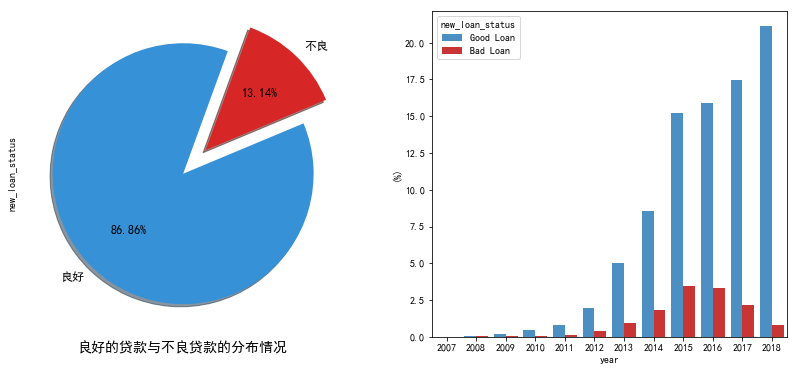

In [20]:
f,ax = plt.subplots(1,2,figsize=(14,6))
colors = ["#3791D7","#D72626"]
labels = ["良好","不良"]

df["new_loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)




ax[0].set_xlabel('良好的贷款与不良贷款的分布情况', fontsize=14)
palette = ["#3791D7", "#E01E1B"]
sns.barplot(x="year", y="loan_amnt", hue="new_loan_status", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

* 不良贷款占了13.14%，但这个结果并不是最终结果，因为有些借贷者可能会在以后成为不良用户，那么这个比例可能会进一步提升
* 良好的贷款业务逐年增长，而不良贷款从2016年开始逐年下降，这是一个好兆头

但是从图中可以看出一个有意思的地方，就是在2015年和2016年的不良贷款是最高的，而后来才开始下降

下面提取出2015年的数据进行具体的分析

In [21]:
df_2015 = df[df.year == 2015]
status_2015 = dict(df_2015['loan_status'].value_counts())

for k in list(status_2015.keys()):
    if k not in bad_status:
        del status_2015[k]
status_names = list(status_2015.keys())
status_numbers = list(status_2015.values())

Text(0.5, 1.0, '2015不良信贷的分布情况')

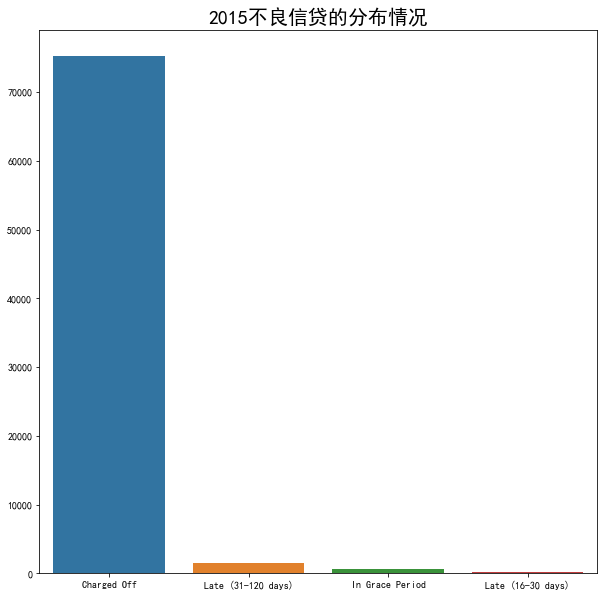

In [22]:
plt.figure(figsize=(10,10))
g = sns.barplot(status_names, status_numbers,capsize=.6)
plt.title('2015不良信贷的分布情况',size = 20)

fig = plt.figure(figsize=(9,9))
explode = (0,0,0,0)
plt.pie(status_numbers,explode=explode,labels=status_names,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize':10,'color':'black'})
plt.show()

In [23]:
bad_df_2015 = df_2015[(df_2015.loan_status == 'Charged Off') | (df_2015.loan_status == 'Late (31-120 days)') | (df_2015.loan_status == 'In Grace Per iod') | (df_2015.loan_status == 'Late (16-30 days)')]

In [24]:
print("销账在2015年的不良贷款中占了"+str(round(status_2015['Charged Off']/len(bad_df_2015) * 100,2))+"%")

销账在2015年的不良贷款中占了97.65%


* 在2015年有很多不能回收的债务，占了97.65%

下面分析Charged Off这部分的数据，看看有什么规律

In [25]:
cf_df_2015 = df_2015[df_2015.loan_status == 'Charged Off']
p_cf_df_2015 = cf_df_2015.purpose

In [26]:
p_dict = {}

for i in p_cf_df_2015:
    p_dict[i] = p_dict.get(i,0) + 1

Text(0.5, 1.0, '2015Charged Off对应的使用目的分布情况')

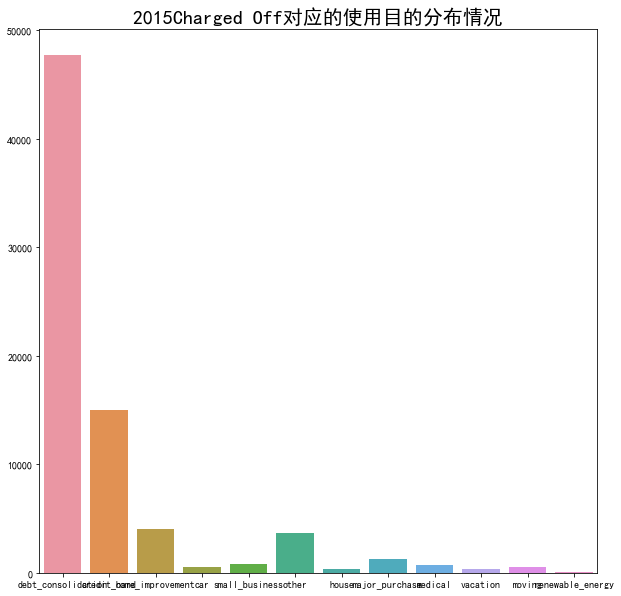

In [27]:
plt.figure(figsize=(10,10))
g = sns.barplot(list(p_dict.keys()),list(p_dict.values()),capsize=.6)
plt.title('2015Charged Off对应的使用目的分布情况',size = 20)

使用目的的前三名是：
* 债务合并：用贷款的方式偿还其他的贷款
* 偿还信用卡
* 房屋装修

* 2015年有很多不能回收的债务，而这些债务都是通过债务合并的方式进行的，那么就证明有很多放贷机构不提供这样的贷款，以降低债务无法回收的风险，这可能是由于当时经济环境不景气导致的

* 上面展示的是2015年的不良贷款对应的贷款目的分布情况，占了最多了就是债务合并、偿还信用卡和房屋装修，下面统计每年的目的分布的情况，看看有什么差异存在

下面统计每年的贷款目的的变化情况

In [28]:
def get_numbers(column,data,year):
    dict_column = {}
    data = data[data['year'] == year]
    data = data[column]
    
    for i in data:
        dict_column[i] = dict_column.get(i,0) + 1

    
    return dict_column

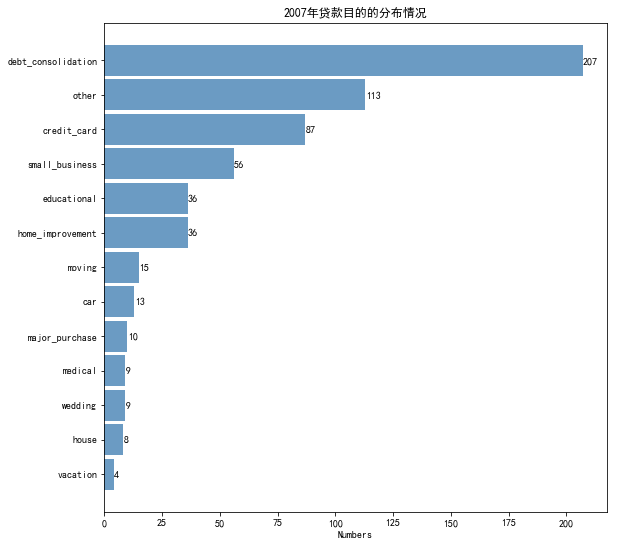

In [29]:
#画条形图
def draw(year):
    names = []
    numbers = []

    dict_column = get_numbers('purpose',df,year)
    dict_column = sorted(dict_column.items(),key=lambda x:x[1],reverse=False)
    names = [i[0] for i in dict_column]
    numbers = [i[1] for i in dict_column]
    
    fig = plt.figure(figsize=(9,9))
    plt.barh(names,numbers,height=0.9,color='steelblue',alpha=0.8)
    plt.xlabel("Numbers")
    plt.title(str(year)+"年贷款目的的分布情况")
    for x, y in enumerate(numbers):
        plt.text(y + 0.2, x - 0.1, '%s' % y)
    plt.show()
    
draw(2007)

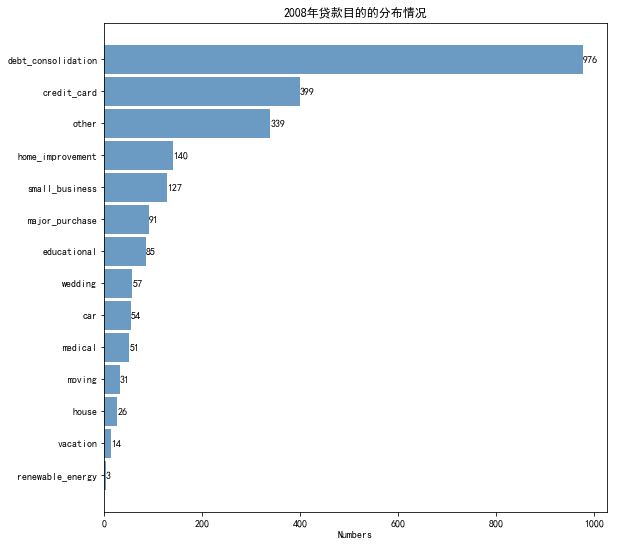

In [30]:
draw(2008)

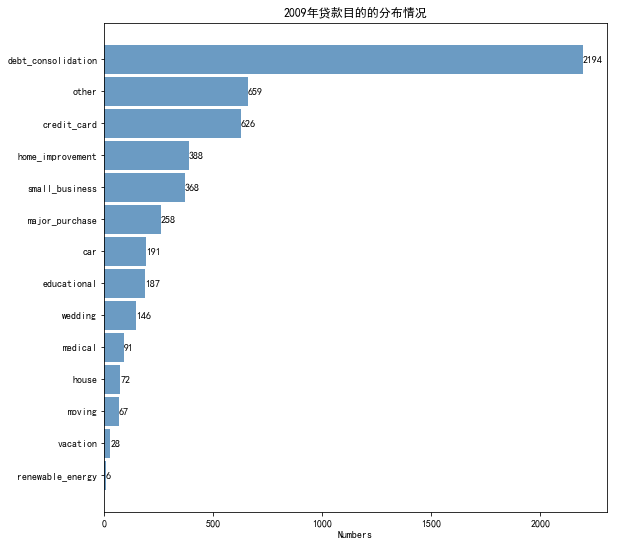

In [31]:
draw(2009)

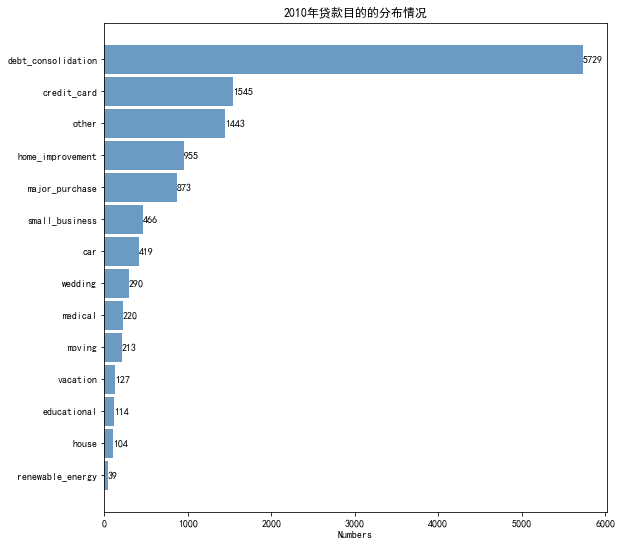

In [32]:
draw(2010)

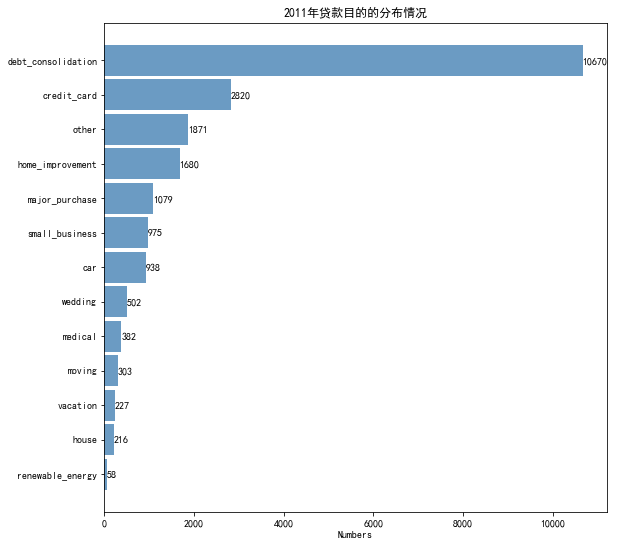

In [33]:
draw(2011)

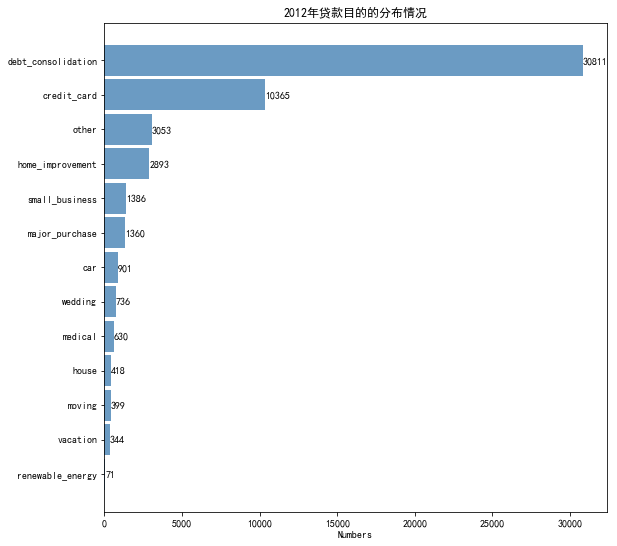

In [34]:
draw(2012)

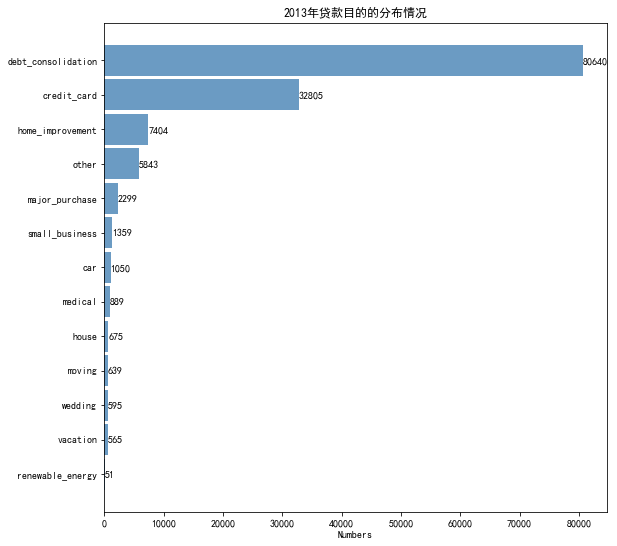

In [35]:
draw(2013)

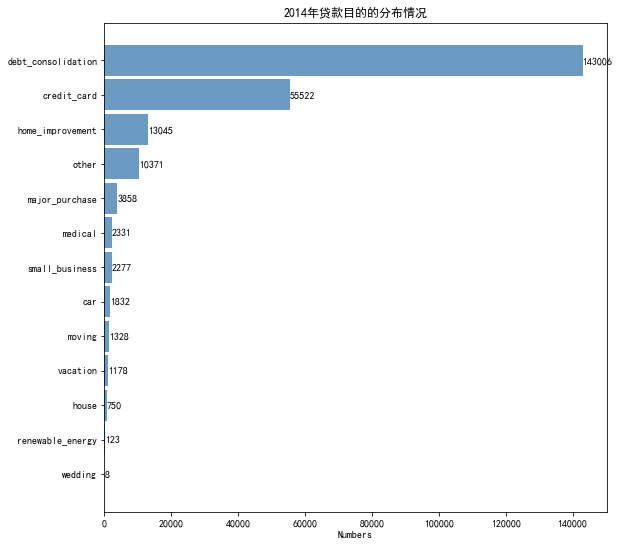

In [36]:
draw(2014)

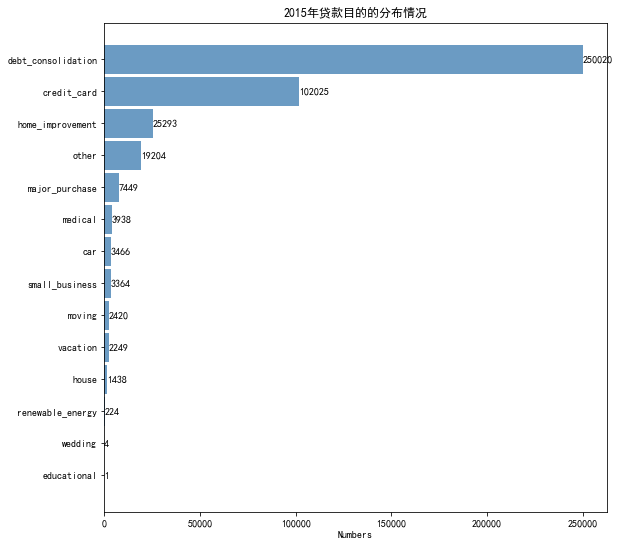

In [37]:
draw(2015)

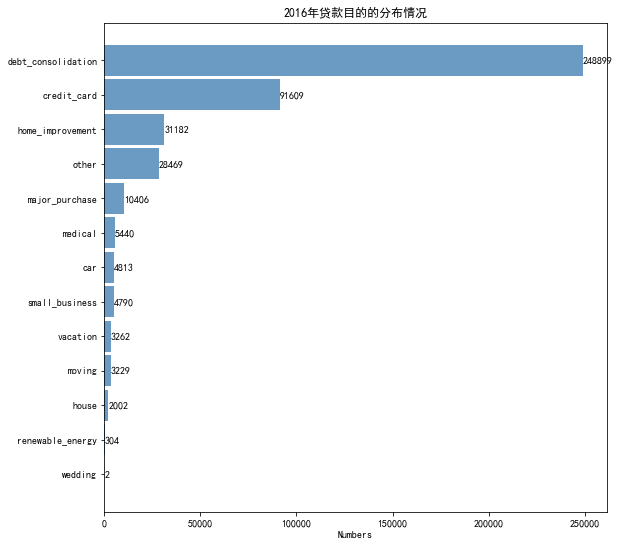

In [38]:
draw(2016)

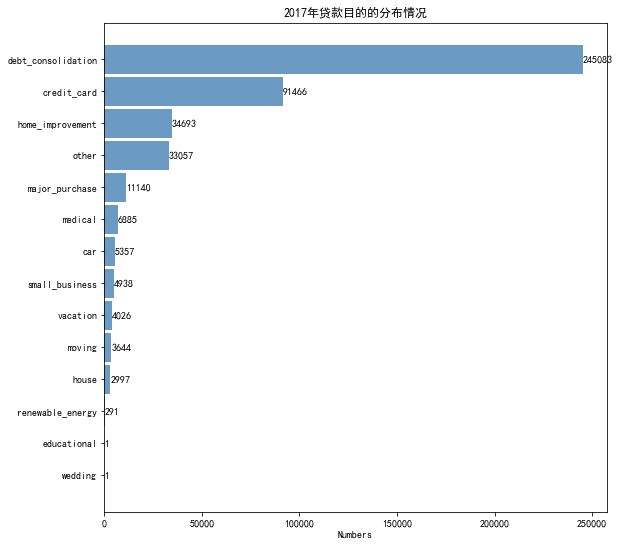

In [39]:
draw(2017)

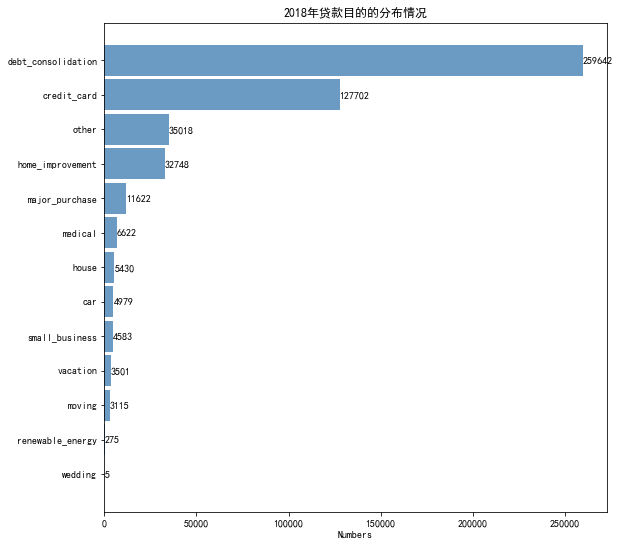

In [40]:
draw(2018)

* 债务合并是最主要的贷款目的，而以房屋修缮为目的来贷款的从2013年开始明显增长

下面观察每种贷款目的逐年的变化情况，这样可以把握整体动向

In [41]:
#画折线图
def draw_line(name):
    years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
    numbers = []
    for year in years:
        new_df = df[df.year == year]
        new_df = new_df[new_df['purpose'] == name]
        numbers.append(len(new_df))
    
    g = sns.lineplot(years,numbers,color="red")
    plt.title(name+"逐年的变化趋势")

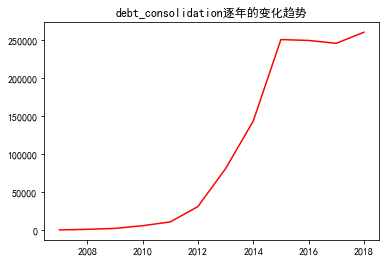

In [42]:
draw_line('debt_consolidation')

* 可以看出债务合并从2015年开始趋于平稳，甚至有所下降，而在2017年开始有增长的趋势

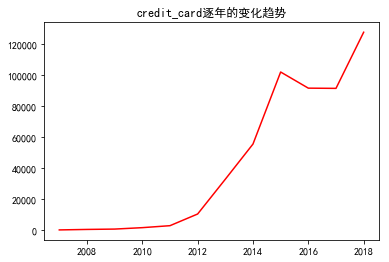

In [43]:
draw_line('credit_card')

* 以偿还信用卡为目的的贷款从2015年开始明显下降，但是从2017年开始迅速增长

上面的债务合并和信用卡还款都是从2015年开始有下降趋势的，应该是受到了经济大环境、政策等因素的影响

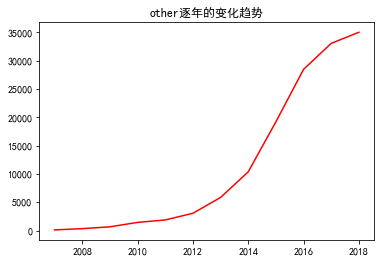

In [43]:
draw_line('other')

* other一直都处在增长的状态

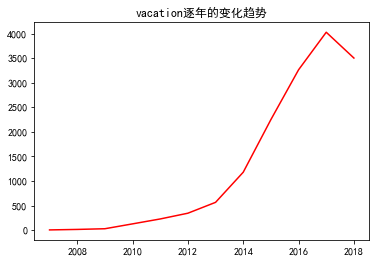

In [44]:
draw_line('vacation')

* 以度假为目的的贷款从2017年开始明显下降，出游目的减少可能是受到了经济不景气、天气等因素的影响

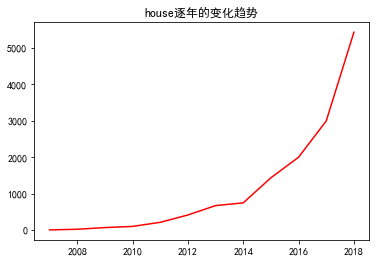

In [45]:
draw_line('house')

* 以买房为目的的贷款呈直线上涨，人们从2014年开始有了买房的需求，且逐年都是飞速增长的

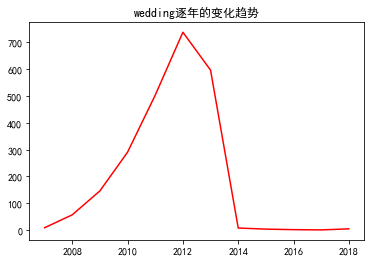

In [46]:
draw_line('wedding')

* 以结婚为目的的贷款从2012年开始直线下降，直到2014年完全消失，人们的收入水平提高了，这部分贷款就不需要了；当然也有可能是放贷公司不提供这样的贷款了

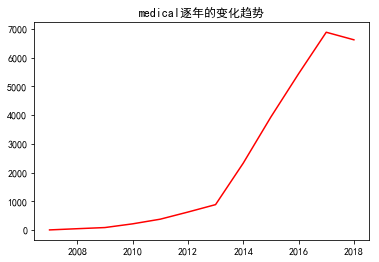

In [48]:
draw_line('medical')

* 医疗贷款从2013年开始明显增长，但是在2017年开始有下降的趋势，这可能是由于国家政策导致的，或者人们的健康得到了很好的保障

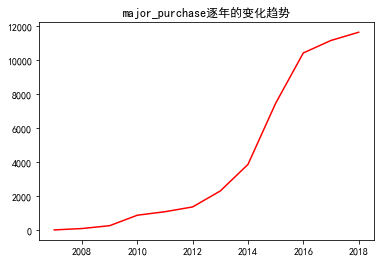

In [49]:
draw_line('major_purchase')

* 大采购从2016年开始增长放缓

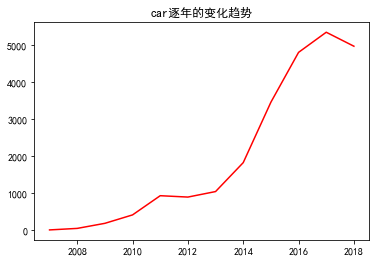

In [50]:
draw_line('car')

* 以购车为目的的贷款从2013年开始直线上涨，但是从2017年开始有所下降

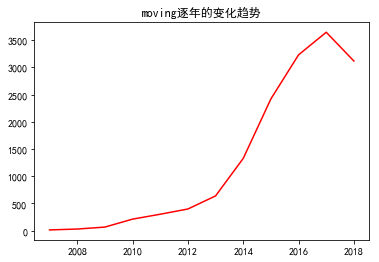

In [51]:
draw_line('moving')

* 以公司的拓展或发展为目的的贷款从2013年开始明显增长，但是在2017年开始下降

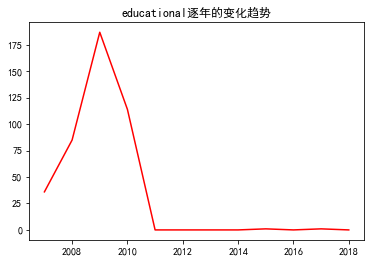

In [52]:
draw_line('educational')

* 以教育为目的的贷款从2009年开始直线下降，直到2011年完全消失

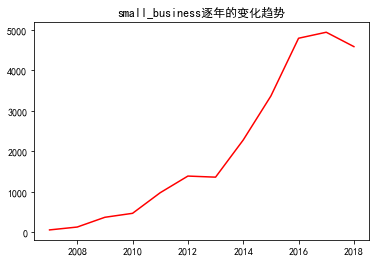

In [53]:
draw_line('small_business')

* 小企业的贷款从2013年开始明显增长，到2016年增长开始放缓，到2017年开始有所下降

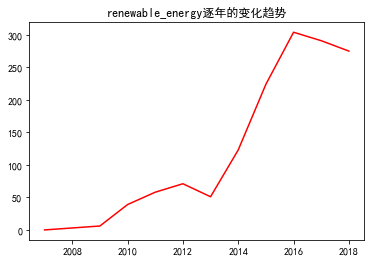

In [45]:
draw_line('renewable_energy')

* 以可再生能源为目的的贷款从2013年开始迅猛增长，但是从2016年开始有下降的趋势，我觉得这可能是由于热度过去后，被关注的强度就没那么高了

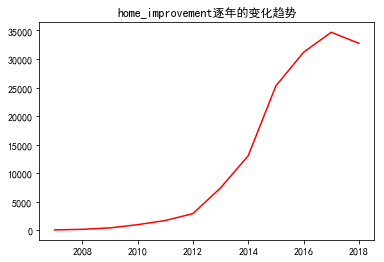

In [55]:
draw_line('home_improvement')

* 以房屋修缮为目的的贷款从2017年开始下降

从上面的折线图可以看出三点比较明显的变化趋势：
* 很多方面的贷款在2012之前都是非常低的，但是从2012年开始或2013年有了明显的增长趋势
* 以债务合并和信用卡为目的的贷款从2015年开始呈下降趋势
* 以度假、医疗、购车、扩建、小企业和房屋修缮为目的的贷款从2016年开始增长放缓，到2017年开始呈下降趋势，而可再生能源从2016年就已经开始下降了

下面先给出结论，然后再给出分析过程：
* 第一点：美国在2007-2012爆发了经济危机，这也是为什么在2012年之前贷款业务非常低的原因，而2012年经济危机结束后，经济开始复苏，那么贷款业务也就有了增长的趋势
* 第二点：债务合并和信用卡贷款下降可能是受到了自然灾害、失业、过度债务和缩入缩减(经济不景气)等因素的影响
* 第三点：由于贷款利率的提升，导致人们的还款成本上升，这会影戏到人们消费的意愿，而这么做的主要目的就是为了在经济快速发展的过程中也要保障物价的稳定和经济稳定可持续的发展

上面给出的第一个结论是网上查到的

下面是针对第二个结论的分析过程

In [46]:
def draw_hardship_reason(year):
    names = []
    numbers = []

    dict_column = get_numbers('hardship_reason',df,year)
    if np.nan in dict_column.keys():
        del dict_column[np.nan]
    dict_column = sorted(dict_column.items(),key=lambda x:x[1],reverse=False)
    names = [i[0] for i in dict_column]
    numbers = [i[1] for i in dict_column]
    
    fig = plt.figure(figsize=(9,9))
    plt.barh(names,numbers,height=0.9,color='steelblue',alpha=0.8)
    plt.xlabel("Numbers")
    plt.title(str(year)+"困难原因的分布情况")
    for x, y in enumerate(numbers):
        plt.text(y + 0.2, x - 0.1, '%s' % y)
    plt.show()

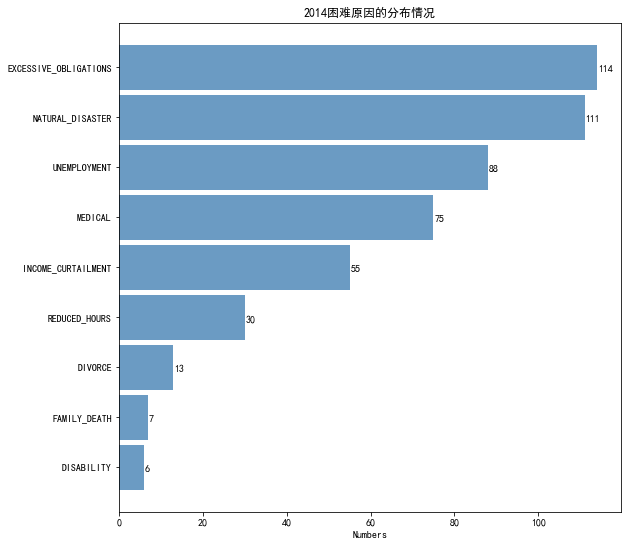

In [47]:
draw_hardship_reason(2014)

2014年困难的前五名是：
* 过度的债务
* 自然灾害
* 失业
* 医学治疗
* 收入缩减

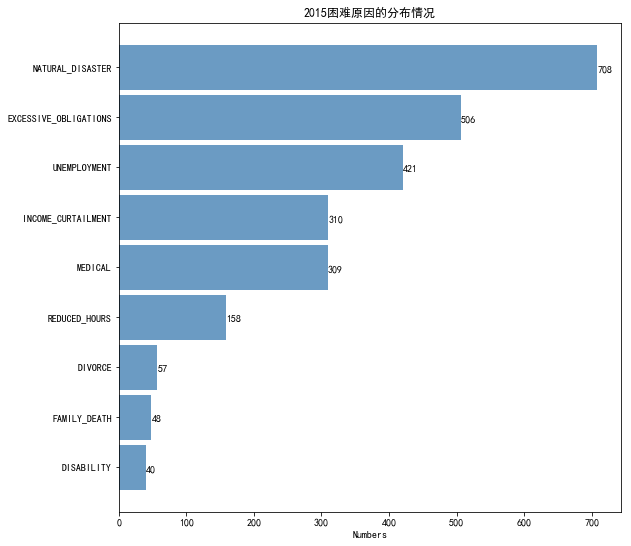

In [48]:
draw_hardship_reason(2015)

2015年困难的前五名是：
* 自然灾害
* 过度的债务
* 失业
* 收入缩减
* 医学治疗

其中自然灾害在2015年迅猛增长，且每个困难都增长了很多

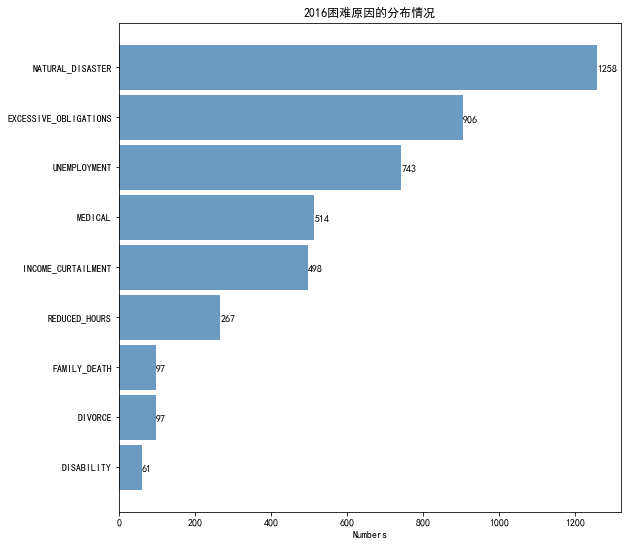

In [49]:
draw_hardship_reason(2016)

2016年困难的前五名是：
* 自然灾害
* 过度的债务
* 失业
* 医学治疗
* 收入缩减

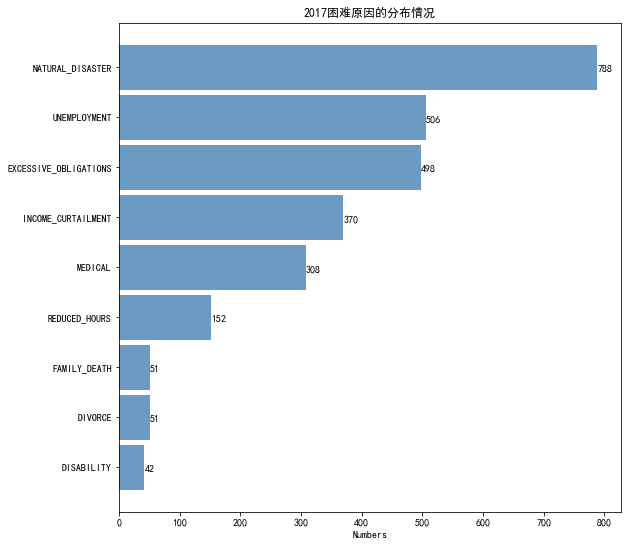

In [50]:
draw_hardship_reason(2017)

2017年困难的前五名是：
* 自然灾害
* 失业
* 过度的债务
* 收入缩减
* 医学治疗


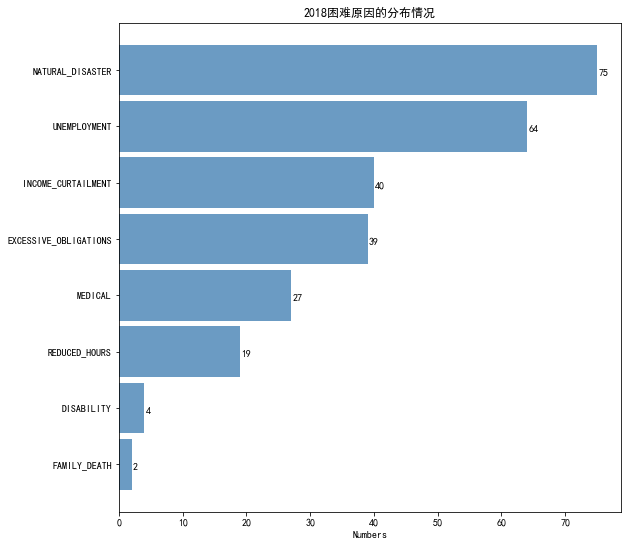

In [51]:
draw_hardship_reason(2018)

2018年困难的前五名是：
* 自然灾害
* 失业
* 收入缩减
* 过度的债务
* 医学治疗

上面展示了从2014-2018困难原因的分布情况，可以得出的结论是：
* 困难的前五名基本都是自然灾害、失业、过度的债务、收入缩减、医学治疗这几个方面
* 2015年的各项问题都增长了很多，这可能会导致很多人缺乏贷款的需求，也会导致很多不良贷款的出现
* 2016年的各项问题比2015年还要多
* 2017年各项问题才开始下降，直到2018年才降到正常水平

* 上面的分析也就验证了第二个结论，正是由于在2015年前后的自然灾害、失业、过度的债务、收入缩减、医学治疗这几个方面的问题增长很多，才导致了贷款业务的萧条和很多不良贷款的出现

下面针对第三个结论进行分析

In [53]:
#贷款利率
dict_numbers = {}
#税率
tax_liens = {}
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]


for year in years:
    dict_numbers[year] = [df[df.year == year]['int_rate'].min(),df[df.year == year]['int_rate'].max()]
    tax_liens[year] = [df[df.year == year]['tax_liens'].min(),df[df.year == year]['tax_liens'].max()]

In [56]:
#税率
pd.DataFrame(tax_liens,index=['min','max'])

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,0.0,0.0,0.0,0.0,5.0,53.0,63.0,85.0,61.0,61.0,52.0


* 税率从2012年开始增加，直到2016年开始下降

In [57]:
pd.DataFrame(dict_numbers,index=['min','max'])

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
min,7.12,6.00,6.00,5.42,5.42,6.00,6.00,6.00,5.32,5.32,5.32,5.31
max,17.86,19.47,21.21,21.64,24.59,24.89,26.06,26.06,28.99,30.99,30.99,30.99


* 贷款利率从2016年开始增加，所以在贷款利率增加的情况下，每个人的还款成本就增长了，这会直接导致消费水平下降，所以这可能就是为什么从2016年开始各项贷款业务有下降的原因

* 而像贷款利率调整这样的事情都是国家政策的决定，而目的就是为了避免通货膨胀，为了防止经济增长过快而导致的物价问题，是在保证物价的相对稳定；并且提高贷款利率还会增加贷款的成本，这样贷款的人就变少了，可以减少货币的供给，最终会保持经济持序稳定的发展

* 美国经济从2016年开始呈良好发展，这可能就是提高贷款利率的原因之一

下面统计哪些领域的贷款利率提升了

In [58]:
data[data.int_rate > 28.99]['purpose'].value_counts()

debt_consolidation    7541
other                 1336
credit_card           1120
home_improvement       689
major_purchase         297
small_business         257
house                  178
medical                131
moving                 127
car                     74
vacation                48
renewable_energy         9
Name: purpose, dtype: int64

* 可以看出贷款利率大于28.99涉及到很多不同的领域，所以这确实会让贷款的人减少，因为还款成本上升了

下面的分析是希望找出不同地区的还款情况，看看不同区域的还款情况，这有助于分析在哪里放贷可以带来更好的收益

In [59]:
#将城市按区域划分
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

In [60]:
df['region'] = df['addr_state'].apply(finding_regions)

In [61]:
#获取时间
df['complete_date'] = pd.to_datetime(df['issue_d'])

In [62]:
#按时间和区域进行分组排序
group_dates = df.groupby(['complete_date','region'],as_index=False).sum()

In [63]:
#定义截至日期直到月
group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

In [64]:
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()

In [65]:
df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

Text(0.5, 1.0, '不同区域的贷款的变化情况')

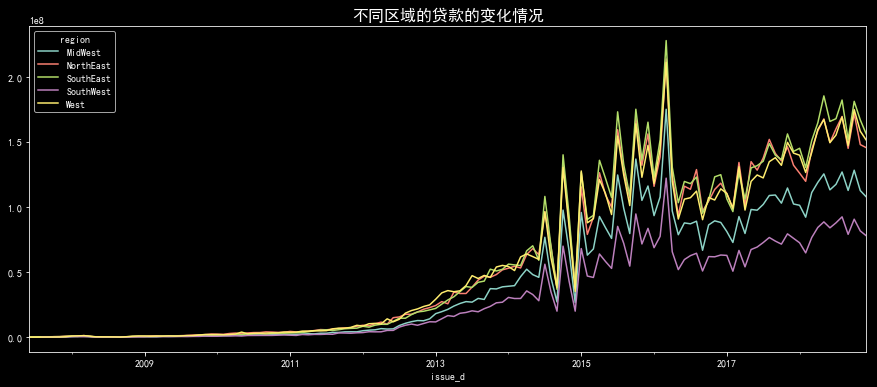

In [66]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('不同区域的贷款的变化情况', fontsize=16)

* 从上面可以看出东南部、西部和东北部地区的贷款发放量是最高的

In [67]:
new_bad_status = ['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Does not meet the credit policy','Default',]

In [68]:
addrs = ['MidWest','NorthEast','SouthEast','SouthWest','West']

In [69]:
def get_num(name):
    y = []
    for addr in addrs:
        data = df[df.region == addr]
        data = data[data.loan_status == name]
        y.append(len(data))
    
    return y

In [70]:
y1 = np.array(get_num('Charged Off'))
y2 = np.array(get_num('Late (31-120 days)'))
y3 = np.array(get_num('In Grace Period'))
y4 = np.array(get_num('Late (16-30 days)'))
y5 = np.array(get_num('Does not meet the credit policy. Status:Charged Off'))
y6 = np.array(get_num('Default'))

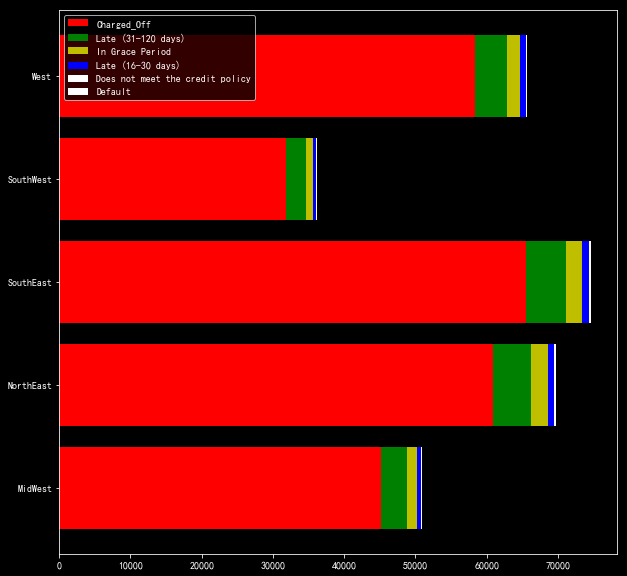

In [71]:
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
plt.barh(addrs,y1,color="r",label="Charged_Off")
plt.barh(addrs,y2,left=y1,color="green",label="Late (31-120 days)")
plt.barh(addrs,y3,left=y1+y2,color="y",label="In Grace Period")
plt.barh(addrs,y4,left=y1+y2+y3,color="blue",label="Late (16-30 days)")
plt.barh(addrs,y5,left=y1+y2+y3+y4,color="w",label="Does not meet the credit policy")
plt.barh(addrs,y6,left=y1+y2+y3+y4+y5,color="w",label="Default")

plt.legend()
plt.show()

* 可以看出东北和东南地区的不良贷款比例很高，而中东和西南地区的不良贷款要少一些

* 如果要分析出为什么这两个地区的不良贷款要少一些的话，就必须获取更多的信息，比如经济、环境、国家政策等的变化，但是仅从上图展示的效果可以也可以基本对不同地区的风险进行评估了，从而降低投资风险

In [72]:
loan_amount = df.groupby(['region','addr_state'],as_index=False).loan_amnt.sum()
int_rate = df.groupby(['region','addr_state'],as_index=False).int_rate.mean()
income = df.groupby(['region','addr_state'],as_index=False).annual_inc.mean()

states = loan_amount['addr_state'].values.tolist()
sum_states = loan_amount['loan_amnt'].values.tolist()
ave_int_rate = int_rate['int_rate'].values.tolist()
ave_income = income['annual_inc'].values.tolist()

In [73]:
for i in np.argsort(sum_states)[-3:]:
    print(states[i])

NY
TX
CA


发放贷款最多的三个区域是：
* 纽约
* 德克萨斯
* 加利福尼亚

In [74]:
ave_NY_int_rate = (int_rate[int_rate.addr_state == 'NY']['int_rate'].values)[0]
ave_TX_int_rate = (int_rate[int_rate.addr_state == 'TX']['int_rate'].values)[0]
ave_CA_int_rate = (int_rate[int_rate.addr_state == 'CA']['int_rate'].values)[0]
ave_int_rate = df['int_rate'].mean()
print("纽约的贷款利率是"+str(round(ave_NY_int_rate,2)))
print("德克萨斯州的贷款利率是"+str(round(ave_TX_int_rate,2)))
print("加利福尼亚州的贷款利率是"+str(round(ave_CA_int_rate,2)))
print("-----------------------------")
print("美国的贷款利率是"+str(round(ave_int_rate,2)))

纽约的贷款利率是13.26
德克萨斯州的贷款利率是13.0
加利福尼亚州的贷款利率是12.98
-----------------------------
美国的贷款利率是13.09


可以看出这三个州的贷款利率与美国总体的水平是基本保持一致的

In [75]:
ave_NY_income = (income[income.addr_state == 'NY']['annual_inc'].values)[0]
ave_TX_income = (income[income.addr_state == 'TX']['annual_inc'].values)[0]
ave_CA_income = (income[income.addr_state == 'CA']['annual_inc'].values)[0]
ave_income = df['annual_inc'].mean()
print("纽约的年收入是"+str(round(ave_NY_income)))
print("德克萨斯州的年收入是"+str(round(ave_TX_income)))
print("加利福尼亚州的年收入是"+str(round(ave_CA_income)))
print("-----------------------------")
print("美国的平均年收入是"+str(round(ave_income)))

纽约的年收入是81057.0
德克萨斯州的年收入是82729.0
加利福尼亚州的年收入是83848.0
-----------------------------
美国的平均年收入是77992


* 上面三个地区的年收入水平都要高于美国总体的平均年收入
* 这也就可以解释为什么大多数贷款都是在这些州发放的了

下面分析年收入对于对于贷款的影响有多大

首先定义年收入10万以下的为低收入人群，10万-20万为中收入人群，20万以上为高收入人群

In [76]:
#进行人群定位
def income(income):
    if income < 100000:
        return 'low'
    elif income >= 100000 and income < 200000:
        return 'mid'
    else:
        return 'hight'

In [77]:
df['income_status'] = df['annual_inc'].apply(income)

In [78]:
income_status = {}
for value in df['income_status']:
    income_status[value] = income_status.get(value,0) + 1

In [79]:
income_p = []

for key in ['low','mid','hight']:
    value = income_status[key]
    income_p.append(value/len(df))

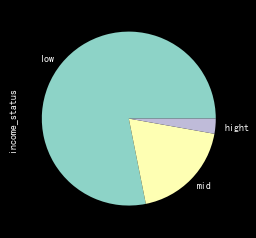

In [81]:
labels = ['low','mid','hight']
df["income_status"].value_counts().plot.pie(labels=labels)

* 大多数都是低收入人群，占了78%；中收入人群占19%，而高收入人群只有3%

In [82]:
low_df = df[df.income_status == 'low']
low_dict = {}

for key in low_df['loan_status']:
    if key in bad_status:
        low_dict[key] = low_dict.get(key,0) + 1
    

sum = 0
for value in list(low_dict.values()):
    sum += value

rate = round(sum/len(low_df),2)
print("低收入人群的不良贷款的比例是"+str(round(rate*100))+"%")

低收入人群的不良贷款的比例是14%


In [83]:
mid_df = df[df.income_status == 'mid']
mid_dict = {}

for key in mid_df['loan_status']:
    if key in bad_status:
        mid_dict[key] = mid_dict.get(key,0) + 1
    

sum = 0
for value in list(mid_dict.values()):
    sum += value
    
rate = round(sum/len(mid_df),2)
print("中等收入人群的不良贷款的比例是"+str(round(rate*100))+"%")

中等收入人群的不良贷款的比例是10%


In [84]:
hight_df = df[df.income_status == 'hight']
hight_dict = {}

for key in hight_df['loan_status']:
    if key in bad_status:
        hight_dict[key] = hight_dict.get(key,0) + 1
    

sum = 0
for value in list(hight_dict.values()):
    sum += value
    
rate = round(sum/len(hight_df),2)
print("高收入人群的不良贷款的比例是"+str(round(rate*100))+"%")

高收入人群的不良贷款的比例是9%


* 可以看出低收入人群的不良贷款业务比其他群体的占比都要多

下面分析信用等级对于贷款的影响有多大

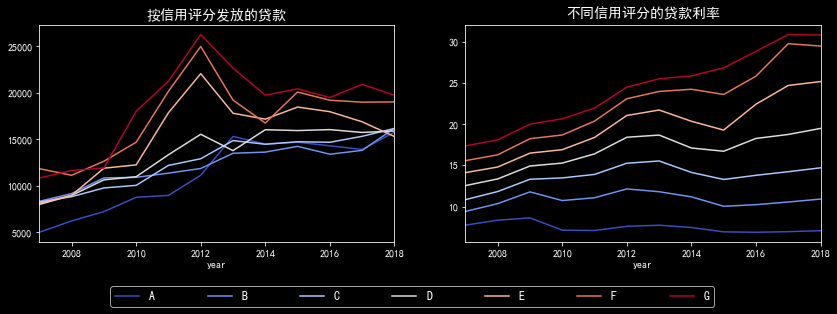

In [86]:
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('按信用评分发放的贷款', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('不同信用评分的贷款利率', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)


* 可以看出，即使信用等级很低，也会给客户提供高额贷款，但这会增加风险；并且信用等级越低，贷款利率就越高，这也是降低风险的一种策略

Text(0, 0.5, 'Interest Rate (%)')

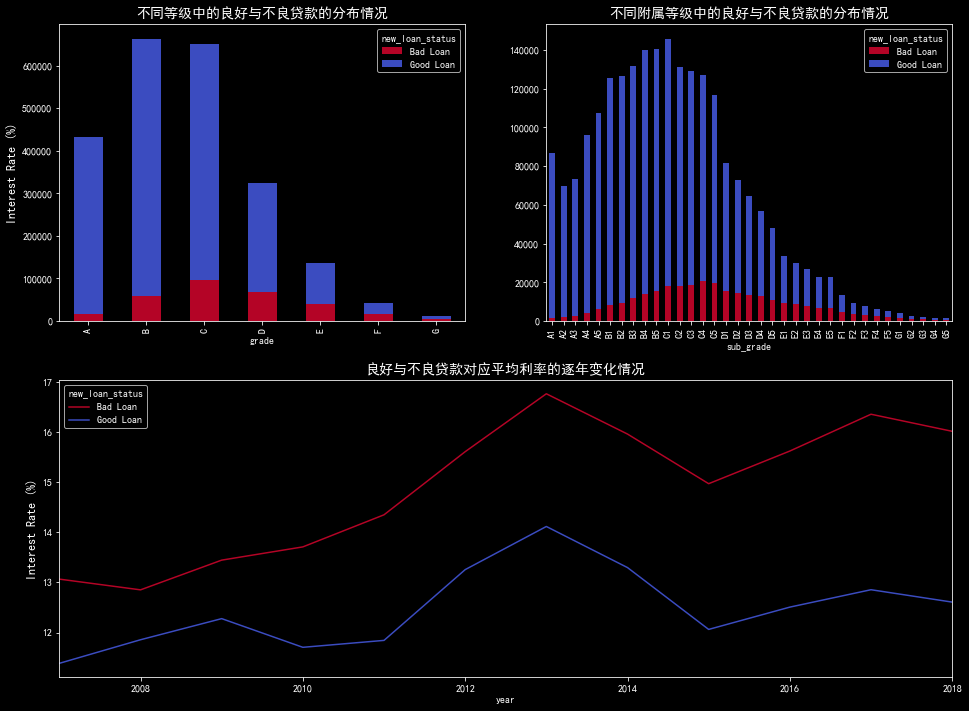

In [89]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'new_loan_status']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('不同等级中的良好与不良贷款的分布情况', fontsize=14)
ax1.set_ylabel('Interest Rate (%)', fontsize=12)

loans_by_grade = df.groupby(['sub_grade', 'new_loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('不同附属等级中的良好与不良贷款的分布情况', fontsize=14)

by_interest = df.groupby(['year', 'new_loan_status']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('良好与不良贷款对应平均利率的逐年变化情况', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

* 从等级和附属等级来看，级别为C的时候，不良贷款发生的可能性更高
* 不良贷款的平均贷款利率是要更高的，这也会在一定程度上降低贷款风险

下面分析DTI对于贷款的影响有多大

Text(0, 0.5, 'DTI (%)')

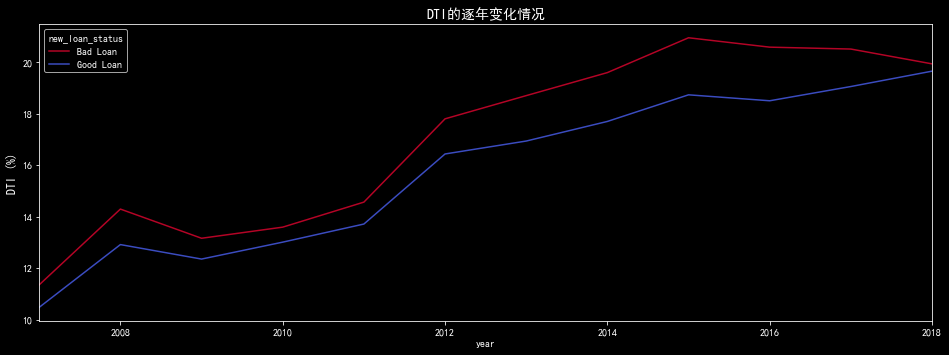

In [91]:
fig = plt.figure(figsize=(16,12))
cmap = plt.cm.coolwarm_r
ax3 = fig.add_subplot(212)
by_interest = df.groupby(['year', 'new_loan_status']).dti.mean()
by_interest.unstack().plot(ax=ax3,colormap=cmap)
ax3.set_title('DTI的逐年变化情况', fontsize=14)
ax3.set_ylabel('DTI (%)', fontsize=12)

* 不良贷款的DTI都是偏高的，因为如果债务占收入的比例越高，那么就证明风险越大
* DTI从2015年开始所有下降

下面分析房屋所有权类型对于贷款的影响有多大

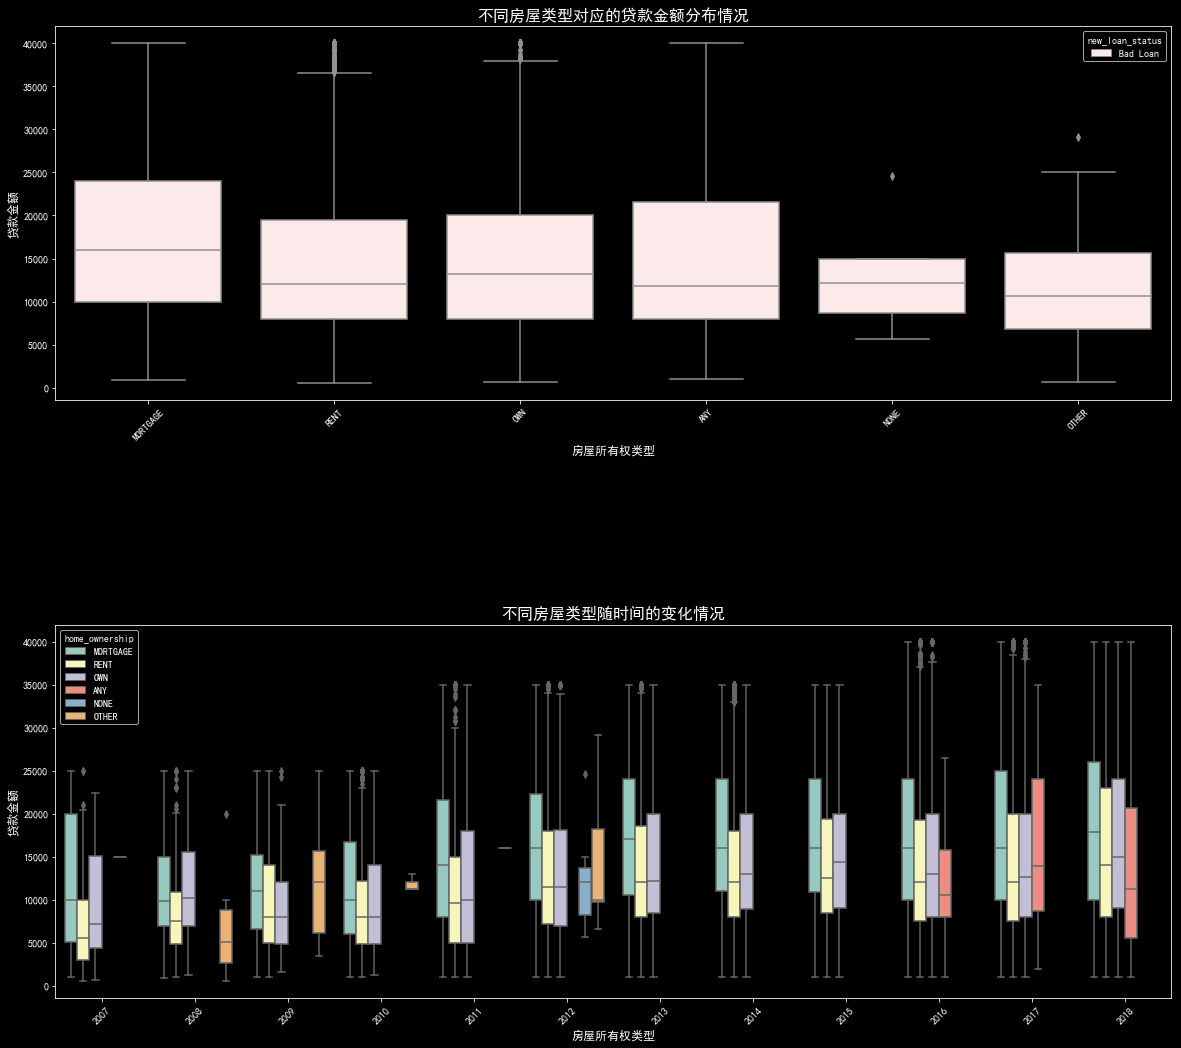

In [92]:
plt.figure(figsize=(20,20))

bad_df = df.loc[df['new_loan_status'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amnt', hue='new_loan_status',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("房屋所有权类型", fontsize=12)
g.set_ylabel("贷款金额", fontsize=12)
g.set_title("不同房屋类型对应的贷款金额分布情况", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amnt', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("房屋所有权类型", fontsize=12)
g1.set_ylabel("贷款金额", fontsize=12)
g1.set_title("不同房屋类型随时间的变化情况", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

* 不良贷款中的抵押贷款是贷款金额最高的
* 抵押贷款类型逐年增加

下面分析贷款利率对于贷款的影响有多大

In [94]:
df['int_rate'].describe()
# Average interest is 13.26% Anything above this will be considered of high risk let's see if this is true.
df['interest_payments'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['int_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['int_rate'] > 13.23, 'interest_payments'] = 'High'

下面分析贷款期限对于贷款的影响有多大

In [95]:
df['term'].value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

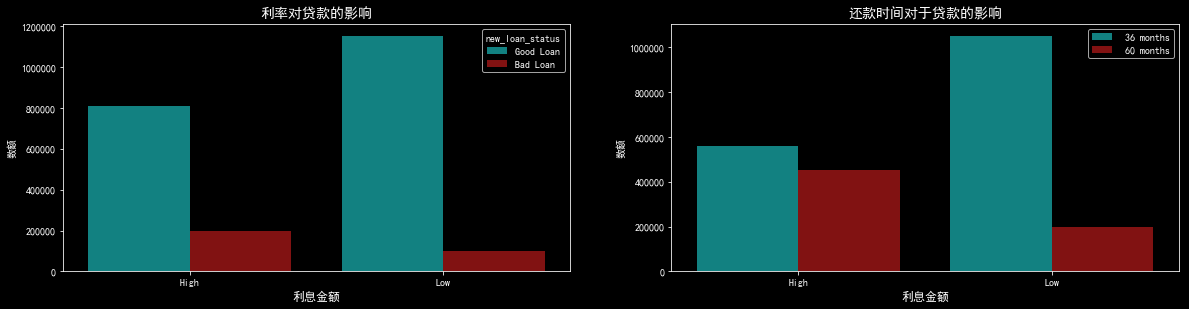

In [101]:
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df, 
                  palette=palette, hue='new_loan_status')

ax.set_title('利率对贷款的影响', fontsize=14)
ax.set_xlabel('利息金额', fontsize=12)
ax.set_ylabel('数额')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df, 
                   palette=palette, hue='term')

ax1.set_title('还款时间对于贷款的影响', fontsize=14)
ax1.set_xlabel('利息金额', fontsize=12)
ax1.set_ylabel('数额')
plt.legend()


plt.show()

* 贷款利率高的更有可能变成不良贷款
* 贷款日期越长，越有可能是不良贷款

In [104]:
status_df = df.groupby(['new_loan_status']).int_rate.mean()
status_df

new_loan_status
Bad Loan     15.691700
Good Loan    12.699803
Name: int_rate, dtype: float64

* 可以看出良好贷款和不良贷款的利率有一定差异，但是这个差异并不大，并不能作为信用评估的一种标准

下面分析贷款目的对于贷款的影响有多大

In [105]:
purpose_df = df.groupby(['purpose']).new_loan_status.value_counts()

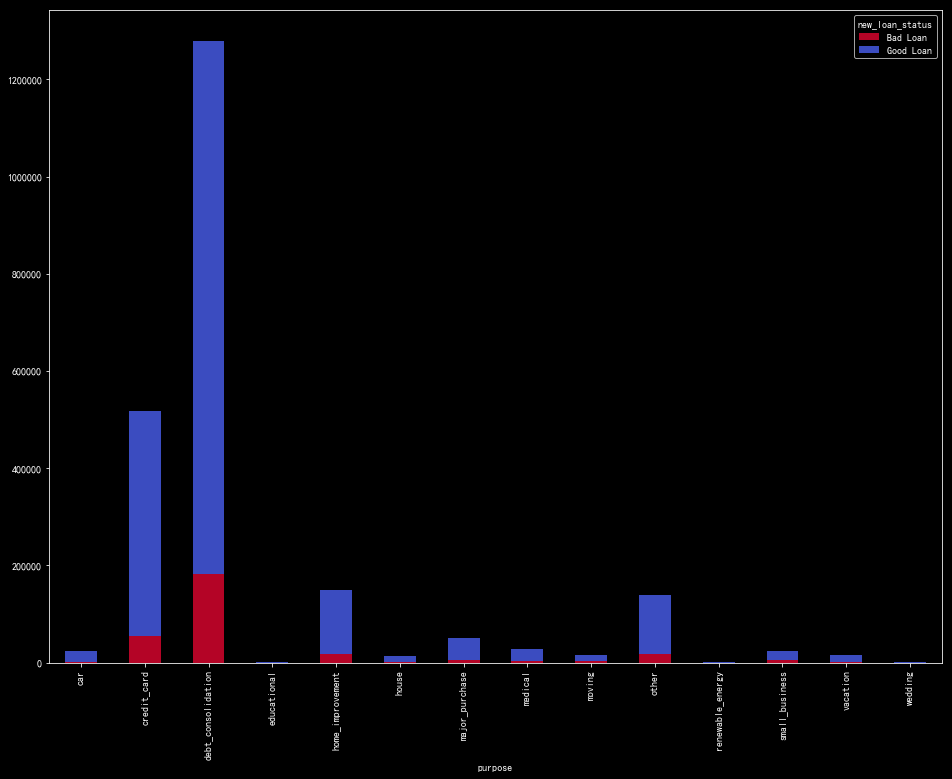

In [106]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
purpose_df.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax, grid=False)

In [107]:
purpose_num = df.groupby(['purpose']).purpose.value_counts()

In [109]:
purposes = ['car','credit_card','debt_consolidation','educational','home_improvement','house','major_purchase','medical','moving',
            'other','renewable_energy','small_business','vacation','wedding']

bads = []
goods = []
sums = []
p_bad = []
p_good = []

for purpose in purposes:
    for statu in ['Good Loan','Bad Loan']:
        if statu == 'Good Loan':
            num = len(df[df.purpose == purpose][df.new_loan_status == statu])
            goods.append(num)
        else:
            num = len(df[df.purpose == purpose][df.new_loan_status == statu])
            bads.append(num)

for i in range(len(goods)):
    sums.append(goods[i] + bads[i])

for i in range(len(sums)):
    p_bad.append(int(round(bads[i]/sums[i],2) * 100))
    p_good.append(int(round(goods[i]/sums[i],2) * 100))

In [112]:
p_dict = {}

for i in range(len(purposes)):
    p_dict[purposes[i]] = p_dict.get(purposes[i],{'Good Loan(%)':p_good[i],'Bad Loan(%)':p_bad[i]})

In [113]:
pd.DataFrame(p_dict).T

,Bad Loan(%),Good Loan(%)
car,10,90
credit_card,11,89
debt_consolidation,14,86
educational,21,79
home_improvement,12,88
house,13,87
major_purchase,12,88
medical,14,86
moving,16,84
other,13,87


可以看出：
* 良好贷款最多的是购车贷款
* 教育贷款和大采购贷款的不良占比是最高的